<a href="https://colab.research.google.com/github/AnIsAsPe/RNN-Resumenes-de-Texto/blob/main/Introducci%C3%B3n_a_TensorFlow_Perceptron_Clasificaci%C3%B3n_de_Im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de bibliotecas y Datos

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Datos/img_cancer_26x26pixeles_con_etiqueta.csv')

print(datos.shape)
datos.head()

(5063, 677)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,clase
0,0.083223,0.083223,0.083223,0.083225,0.083405,0.086613,0.094121,0.095760,0.095939,0.095679,0.095800,0.096059,0.095816,0.097095,0.099579,0.104371,0.121509,0.151148,0.166485,0.142229,0.100965,0.084538,0.083237,0.083223,0.083223,0.083223,0.083223,0.083223,0.083240,0.084179,0.092702,0.113767,0.125615,0.128518,0.128971,0.129441,0.130263,0.130819,0.130473,0.130028,...,0.188656,0.188316,0.192373,0.195840,0.194437,0.196929,0.193218,0.175780,0.128152,0.089850,0.083352,0.083223,0.083223,0.083223,0.083223,0.083223,0.083259,0.085485,0.109178,0.145949,0.147400,0.147373,0.153215,0.136331,0.128650,0.127448,0.124526,0.123044,0.123262,0.126940,0.126231,0.126898,0.121795,0.099420,0.084719,0.083252,0.083223,0.083223,0.083223,0
1,0.083223,0.083223,0.083223,0.083241,0.084892,0.112470,0.192035,0.219843,0.187999,0.180500,0.186738,0.186549,0.189735,0.188186,0.190577,0.193022,0.192217,0.186904,0.186196,0.171629,0.112510,0.085044,0.083240,0.083223,0.083223,0.083223,0.083223,0.083223,0.083305,0.089308,0.159444,0.323082,0.435133,0.479868,0.425607,0.406373,0.416591,0.418254,0.416060,0.420284,...,0.350737,0.328330,0.313045,0.315160,0.312431,0.316695,0.318328,0.278893,0.166274,0.092502,0.083354,0.083223,0.083223,0.083223,0.083223,0.083223,0.083301,0.089128,0.159247,0.262119,0.234541,0.216824,0.201565,0.194039,0.190225,0.190590,0.191628,0.185784,0.175968,0.180713,0.180095,0.184120,0.171356,0.119763,0.086424,0.083276,0.083223,0.083223,0.083223,0
2,0.083223,0.083223,0.083223,0.083240,0.084891,0.108390,0.155804,0.162704,0.179060,0.174836,0.160696,0.163860,0.181359,0.174879,0.160358,0.162727,0.175161,0.189507,0.215191,0.226223,0.136367,0.086611,0.083256,0.083223,0.083223,0.083223,0.083223,0.083223,0.083272,0.087915,0.154537,0.309475,0.352005,0.328503,0.358213,0.373566,0.346785,0.339945,0.390837,0.392600,...,0.332288,0.331581,0.343050,0.345295,0.330323,0.323152,0.320105,0.279885,0.169279,0.092595,0.083367,0.083223,0.083223,0.083223,0.083223,0.083223,0.083344,0.091139,0.171438,0.296291,0.282717,0.251271,0.217253,0.197555,0.193422,0.184207,0.180436,0.170264,0.177799,0.194378,0.195019,0.178956,0.169096,0.118785,0.086534,0.083280,0.083223,0.083223,0.083223,0
3,0.083223,0.083223,0.083223,0.083241,0.084968,0.108683,0.163460,0.192673,0.178441,0.165327,0.172069,0.186495,0.178956,0.167983,0.162857,0.169700,0.184739,0.207286,0.224597,0.247589,0.140882,0.086850,0.083257,0.083223,0.083223,0.083223,0.083223,0.083223,0.083273,0.088753,0.156897,0.300279,0.347244,0.385530,0.391457,0.352362,0.352138,0.404086,0.410804,0.362560,...,0.364815,0.359175,0.341390,0.352469,0.337021,0.346255,0.342502,0.302029,0.177949,0.093565,0.083382,0.083223,0.083223,0.083223,0.083223,0.083223,0.083307,0.089709,0.165956,0.278964,0.248794,0.222636,0.206214,0.199162,0.194352,0.190506,0.195654,0.206230,0.195324,0.191298,0.182867,0.184448,0.180449,0.122997,0.086934,0.083285,0.083223,0.083223,0.083223,0
4,0.083223,0.083223,0.083223,0.083243,0.085150,0.125502,0.223968,0.188510,0.181894,0.181329,0.172335,0.169007,0.173832,0.184832,0.188771,0.204627,0.220360,0.238141,0.270100,0.229637,0.128614,0.086290,0.083253,0.083223,0.083223,0.083223,0.083223,0.083223,0.083290,0.089593,0.165005,0.366662,0.548632,0.433108,0.428869,0.439226,0.422466,0.382484,0.364961,0.389379,...,0.356768,0.350259,0.345512,0.349427,0.360185,0.365872,0.349878,0.325673,0.188289,0.094558,0.083407,0.083223,0.083223,0.083223,0.083223,0.083223,0.083289,0.087291,0.130107,0.201024,0.221397,0.227356,0.207675,0.190300,0.199108,0.204295,0.192606,0.190277,0.187772,0.186235,0.187462,0.198557,0.191787,0.125617,0.087338,0.083290,0.083223,0.083223,0.083223,0


In [ ]:
X = datos.drop('clase', axis=1)
Y = datos['clase']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

# 1. Construcción del modelo 

* [Modelo secuencial de Keras](https://keras.io/guides/sequential_model/)
* [Funciones de activación ](https://keras.io/api/layers/activations/)

In [ ]:
model = tf.keras.models.Sequential([               

  tf.keras.layers.Dense(1,                         
                        activation='sigmoid',
                        input_shape = (676,)
                        )

  #Dropout previene el sobreajuste del modelo haciendo 0 un porcentaje de las entradas.
  #tf.keras.layers.Dropout(0.2),  

])

In [ ]:
#Regresa una lista de las capas del modelo
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 677       
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(tf.keras.layers.Dense(3,
                                activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 677       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6         
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.pop()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 677       
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


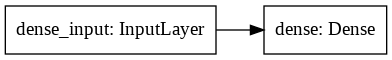

In [ ]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

# Entrenar modelo

Compilar el modelo eligiendo un optimizador

In [ ]:
model.compile(loss='binary_crossentropy',       # función objetivo  que se busca minimizar
                                                # https://keras.io/api/losses/
              
              optimizer='adam',                 # stochastic gradient descent
                                                # https://keras.io/api/optimizers/adam/
              
              metrics=['accuracy'])             


In [ ]:
history = model.fit(x_train, y_train,    
                    epochs=60,                 
                    batch_size=25,       
                    verbose = 2,       
                    validation_data = (x_test, y_test))

Epoch 1/60
142/142 - 1s - loss: 0.4899 - accuracy: 0.7587 - val_loss: 0.5100 - val_accuracy: 0.7564
Epoch 2/60
142/142 - 0s - loss: 0.4933 - accuracy: 0.7602 - val_loss: 0.4914 - val_accuracy: 0.7485
Epoch 3/60
142/142 - 0s - loss: 0.4913 - accuracy: 0.7607 - val_loss: 0.4894 - val_accuracy: 0.7531
Epoch 4/60
142/142 - 0s - loss: 0.4912 - accuracy: 0.7650 - val_loss: 0.4905 - val_accuracy: 0.7479
Epoch 5/60
142/142 - 0s - loss: 0.4898 - accuracy: 0.7571 - val_loss: 0.4884 - val_accuracy: 0.7492
Epoch 6/60
142/142 - 0s - loss: 0.4896 - accuracy: 0.7579 - val_loss: 0.4883 - val_accuracy: 0.7505
Epoch 7/60
142/142 - 0s - loss: 0.4925 - accuracy: 0.7568 - val_loss: 0.4932 - val_accuracy: 0.7505
Epoch 8/60
142/142 - 0s - loss: 0.4881 - accuracy: 0.7590 - val_loss: 0.4927 - val_accuracy: 0.7577
Epoch 9/60
142/142 - 0s - loss: 0.4906 - accuracy: 0.7559 - val_loss: 0.4901 - val_accuracy: 0.7465
Epoch 10/60
142/142 - 0s - loss: 0.4889 - accuracy: 0.7593 - val_loss: 0.5087 - val_accuracy: 0.7531

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

48/48 - 0s - loss: 0.4889 - accuracy: 0.7551
Test loss: 0.4889371395111084
Test accuracy: 0.7551020383834839
